In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering

In [12]:
df = pd.read_csv('22-23_top_assist_UCL.csv')
df.head(30)

,name,team,assits,goals,played,chances_created,chances_per90,total_passes,passes_complete,passes_incomplete,pass_accuracy
0,Kevin De Bruyne,Manchester City,6,2,10,16,1.60,341,265,76,78%
1,Vinícius Júnior,Real Madrid,5,7,12,13,1.08,406,327,79,81%
2,Federico Dimarco,Inter Milan,5,0,11,11,1.00,291,220,71,76%
3,Lionel Messi,Paris Saint Germain,4,4,7,15,2.14,396,346,50,87%
4,Leon Goretzka,Bayern Munich,4,2,9,5,0.56,308,272,36,88%
5,Khvicha Kvaratskhelia,Napoli,4,2,9,13,1.44,262,201,61,77%
6,Alejandro Grimaldo,Benfica,4,2,10,15,1.50,560,477,83,85%
7,Diogo Jota,Liverpool,4,0,6,8,1.33,92,73,19,79%
8,João Cancelo,"Manchester City, Bayern Munich",4,0,10,2,0.20,455,400,55,88%
9,Kylian Mbappé,Paris Saint Germain,3,7,8,5,0.63,256,206,50,80%


In [13]:
x = df.iloc[:,[4,5]].values

In [14]:
wcss = []
for i in range(1,11):
    km = KMeans (n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)
wcss    

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[697.125,
 194.47552447552448,
 147.33333333333331,
 111.65714285714286,
 90.7,
 70.36666666666666,
 52.66666666666667,
 39.16666666666667,
 32.06666666666667,
 24.066666666666666]

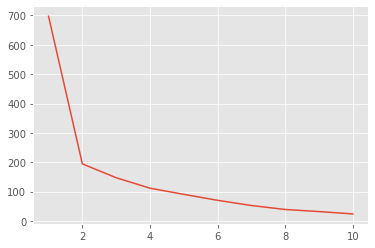

In [15]:
plt.style.use('ggplot')
plt.plot(range(1,11), wcss)

In [16]:
ymeans = KMeans(n_clusters=2)
pred = ymeans.fit_predict(x)
pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1])

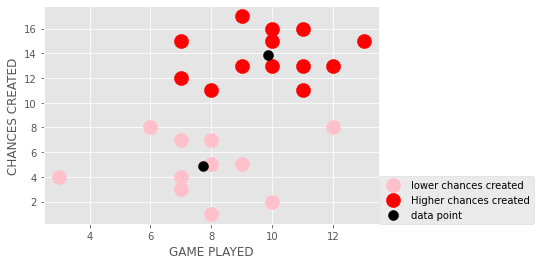

In [21]:
plt.scatter(x[pred == 0,0], x[pred == 0,1], c='pink', s=200,label = 'lower chances created')
plt.scatter(x[pred == 1,0], x[pred == 1,1], c='red', s=200,label = 'Higher chances created')
plt.scatter(ymeans.cluster_centers_[:,0], ymeans.cluster_centers_[:,1], c= 'black', s=100,label = 'data point')
plt.xlabel('GAME PLAYED')
plt.ylabel('CHANCES CREATED')
plt.legend(loc=[1,0])
plt.show()

In [22]:
df2=pd.read_csv('customer_shopping_data.csv')
df2.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [24]:
print(f'The average age of customer is {np.mean(df2["age"])}')

The average age of customer is 43.42708909377922


In [25]:
df2['payment_method'].value_counts()

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

In [26]:
max(df2['category'].value_counts().index)

'Toys'

In [27]:
df2.groupby('shopping_mall')['price'].apply(max)

shopping_mall
Cevahir AVM          5250.0
Emaar Square Mall    5250.0
Forum Istanbul       5250.0
Istinye Park         5250.0
Kanyon               5250.0
Mall of Istanbul     5250.0
Metrocity            5250.0
Metropol AVM         5250.0
Viaport Outlet       5250.0
Zorlu Center         5250.0
Name: price, dtype: float64

In [29]:
df2['invoice_date'].value_counts()

24/11/2021    159
26/02/2023    156
6/1/2021      155
25/07/2022    155
23/10/2022    155
             ... 
27/10/2021     98
29/05/2021     98
30/09/2021     96
2/12/2021      94
16/01/2022     93
Name: invoice_date, Length: 797, dtype: int64

In [30]:
df2['category'].value_counts()

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64